In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb # XGBoost stuff
import numpy as np
from sklearn.feature_selection import SelectFromModel

In [2]:
root = "../../../"

In [3]:
df = pd.read_csv(root + "datasets/multiclass/processed/CICDDoS_corr.csv", index_col=[0])

In [4]:
X = df.drop(columns=[' Label'])
y = df[' Label']

In [5]:
clf_xgb_gain = xgb.XGBClassifier(objective='multi:softmax', num_classes=13, seed=42)
# clf_xgb.fit(X_train, 
#             y_train,
#             verbose=True,
#             ## the next three arguments set up early stopping.
#             early_stopping_rounds=5,
#             eval_metric='mlogloss',
#             eval_set=[(X_test, y_test)])
clf_xgb_gain.fit(X, y)

C:\Users\pedro\miniconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[23:38:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_classes } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:38:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metri

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_classes=13, num_parallel_tree=1,
              objective='multi:softprob', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, seed=42, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [6]:
clf_xgb_gain.feature_importances_

array([0.13653424, 0.00062195, 0.21844982, 0.02958293, 0.09862319,
       0.        , 0.00289226, 0.00153458, 0.00301214, 0.0039819 ,
       0.00190034, 0.00278017, 0.01555222, 0.00143857, 0.00098325,
       0.00057408, 0.00115784, 0.00064716, 0.01679888, 0.00702579,
       0.03717154, 0.01625807, 0.00904938, 0.1735377 , 0.15697357,
       0.        , 0.00099639, 0.        , 0.        , 0.        ,
       0.        , 0.00745257, 0.00288241, 0.00177196, 0.00765461,
       0.03825139, 0.        , 0.00390915], dtype=float32)

Text(0, 0.5, 'Feature Importances (Gain)')

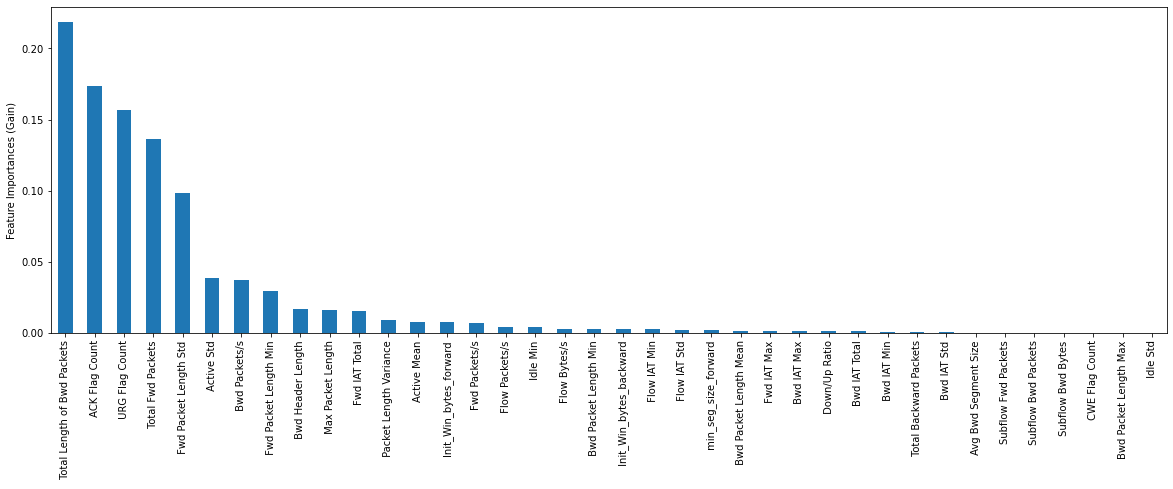

In [7]:
# 1) let's capture the above array in a pandas series
# 2) add the variable names in the index
# 3) sort the features based on their mutual information value
# 4) and make a bar plot

xgb_gain = pd.Series(clf_xgb_gain.feature_importances_)
xgb_gain.index = X.columns
xgb_gain.sort_values(ascending=False).plot.bar(figsize=(20, 6))
plt.ylabel('Feature Importances (Gain)')

In [8]:
selector = SelectFromModel(estimator=clf_xgb_gain,
                        prefit=True,
                        max_features = 20,
                        threshold=-np.inf)
                        #.fit(X_train, y_train)

X.columns[selector.get_support()]

Index([' Total Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Min', ' Fwd Packet Length Std',
       ' Bwd Packet Length Min', 'Flow Bytes/s', ' Flow Packets/s',
       'Fwd IAT Total', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Max Packet Length', ' Packet Length Variance',
       ' ACK Flag Count', ' URG Flag Count', 'Init_Win_bytes_forward',
       ' Init_Win_bytes_backward', 'Active Mean', ' Active Std', ' Idle Min'],
      dtype='object')

In [9]:
# to remove the rest of the features:

X = selector.transform(X)

In [10]:
X.shape

(5280, 20)